In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


Act Reading, label: proficent_score 

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
filename = os.path.join(os.getcwd(), "dataframes", "actReading_11.csv")
actReading_11_df = pd.read_csv(filename, header = 0)


In [9]:
print(actReading_11_df.dtypes)

studentId                 int64
is_proficient              bool
proficient_score        float64
course_ACT Review          bool
course_ACT/WK Rev.         bool
course_ACTReview.5C        bool
course_AG Communica        bool
course_AIDE-ELEM           bool
course_AIDE-LIB            bool
course_ALG I B ACCE        bool
course_ALIITRIGH/A         bool
course_ARMY LET I          bool
course_ARMY LET II         bool
course_ARMY LET III        bool
course_ARMY LET IV         bool
course_ARMYLETIVACT        bool
course_AcAdv.Baseba        bool
course_AcAdv.Basket        bool
course_AcAdv.CrossC        bool
course_AcAdv.Footb         bool
course_AcAdv.Softba        bool
course_AcAdv.Volley        bool
course_Accounting          bool
course_Adv BTA             bool
course_Advanced Agr        bool
course_Agriscience         bool
course_Alg Esntls B        bool
course_Alg II/Trig         bool
course_AlgEnrichmet        bool
course_AlgII/TrigAC        bool
course_Algebra I           bool
course_A

In [10]:
#changing all bools to ints 0 and 1 for the model
actReading_11_df[actReading_11_df.select_dtypes(include=['bool']).columns] = actReading_11_df.select_dtypes(include=['bool']).astype(int)
actReading_11_df.dtypes

studentId                 int64
is_proficient             int32
proficient_score        float64
course_ACT Review         int32
course_ACT/WK Rev.        int32
course_ACTReview.5C       int32
course_AG Communica       int32
course_AIDE-ELEM          int32
course_AIDE-LIB           int32
course_ALG I B ACCE       int32
course_ALIITRIGH/A        int32
course_ARMY LET I         int32
course_ARMY LET II        int32
course_ARMY LET III       int32
course_ARMY LET IV        int32
course_ARMYLETIVACT       int32
course_AcAdv.Baseba       int32
course_AcAdv.Basket       int32
course_AcAdv.CrossC       int32
course_AcAdv.Footb        int32
course_AcAdv.Softba       int32
course_AcAdv.Volley       int32
course_Accounting         int32
course_Adv BTA            int32
course_Advanced Agr       int32
course_Agriscience        int32
course_Alg Esntls B       int32
course_Alg II/Trig        int32
course_AlgEnrichmet       int32
course_AlgII/TrigAC       int32
course_Algebra I          int32
course_A

In [11]:
#Create Training and Test Data
y = actReading_11_df['proficient_score']
X= actReading_11_df.drop(['proficient_score','is_proficient', 'studentId'], axis=1)
print("Number of examples: " + str(X.shape[0]))

X_trainRead,X_testRead, y_trainRead,y_testRead  = train_test_split(X,y, test_size=0.20,stratify = actReading_11_df['is_proficient'],random_state=123)
print(X_trainRead.shape)
print(X_testRead.shape)


Number of examples: 2578
(2062, 238)
(516, 238)


In [13]:
#possible hyperparameters
'''
max_depth_values = [5,18,23,32]
n_estimators_value = [100,250,300,350]
param_grid = {'max_depth' : list(max_depth_values), 'n_estimators' : list(n_estimators_value)}

#Grid Search to find the best hyperparameters 
print("Running Grid Search")
rf_regressor = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_trainRead, y_trainRead)

print("Done")
rf_best_params = rf_grid_search.best_params_

rf_best_params
#{'max_depth': 32, 'n_estimators': 350}
'''

Running Grid Search
Done


{'max_depth': 32, 'n_estimators': 350}

In [14]:
print('Begin Random Forest ')
rf_model = RandomForestRegressor(max_depth=32, n_estimators=350)
rf_model.fit(X_trainRead,y_trainRead)
print('End')

Begin Random Forest 
End


In [15]:
y_rf_predRead = rf_model.predict(X_testRead)
rf_rmse = mean_squared_error(y_testRead, y_rf_predRead, squared=False)
rf_r2 = r2_score(y_testRead, y_rf_predRead)

threshold = 1
y_rf_pred_bool = y_rf_predRead >= threshold
y_test_bool = y_testRead >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_rf_pred_bool, y_test_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.70      0.80       385
        True       0.49      0.85      0.63       131

    accuracy                           0.74       516
   macro avg       0.71      0.78      0.71       516
weighted avg       0.82      0.74      0.76       516

[RF] Root Mean Squared Error: 0.22273190846216734
[RF] R2: 0.5045850105572783


In [16]:
#looking at the micro score
micro_f1 = f1_score(y_test_bool, y_rf_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.7403100775193798


Confusion Matrix:
[[270  19]
 [115 112]]


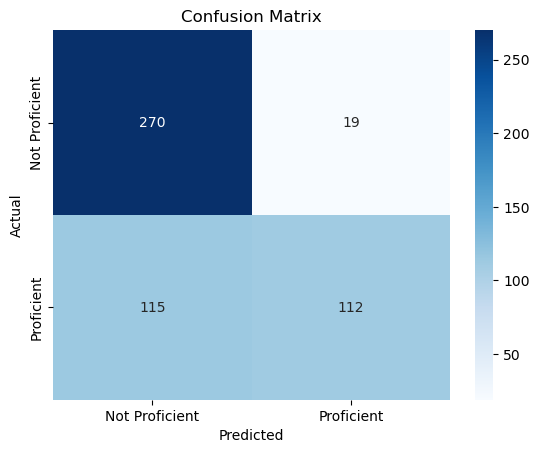

In [17]:
cm = confusion_matrix(y_test_bool, y_rf_pred_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance 

In [18]:
importances = rf_model.feature_importances_
feature_names = X_trainRead.columns

# Combine names and importances, and sort
importance_dfRead = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_dfRead= importance_dfRead.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_dfRead)

                  Feature    Importance
58    course_ChemistryAdv  1.464299e-01
76    course_Eng Gr10 Adv  1.357246e-01
84      course_Enviro Sci  3.136118e-02
40    course_BandConcer.5  1.936047e-02
131   course_LIFE PE 9-12  1.549856e-02
177      course_Spanish 1  1.500161e-02
29     course_Algebra I B  1.343100e-02
208         course_VarFBI  1.315103e-02
96    course_Food Nutritn  1.237735e-02
104       course_Geometry  1.196322e-02
142      course_Music App  1.113943e-02
216    course_Vis Arts II  1.093857e-02
220      course_Vocal I 1  1.016102e-02
158   course_Physical Sci  9.443640e-03
183   course_StudyHall912  9.428294e-03
186      course_Theatre I  8.644838e-03
215     course_Vis Arts I  8.345107e-03
156    course_Phy Sci Adv  7.916801e-03
128   course_Journalism 1  7.914617e-03
209        course_VarFBII  7.840874e-03
67     course_D&TSafetyEd  7.750928e-03
113    course_Health 9-12  7.644408e-03
198    course_USHis I Adv  7.591740e-03
154    course_Per Finance  7.539873e-03


In [20]:
importance_dfRead.head(10)

,Feature,Importance
58,course_ChemistryAdv,0.146430
76,course_Eng Gr10 Adv,0.135725
84,course_Enviro Sci,0.031361
40,course_BandConcer.5,0.019360
131,course_LIFE PE 9-12,0.015499
177,course_Spanish 1,0.015002
29,course_Algebra I B,0.013431
208,course_VarFBI,0.013151
96,course_Food Nutritn,0.012377
104,course_Geometry,0.011963
